In [209]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
Ny = 1
Nx, Nz = 256, 256
# Nx, Nz = 128, 128
Nx, Nz = 64, 64
# et = 720.0
et = 86400.0*10.0
et /= 1200.0
N = 1

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe_dvortex'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

after_full_step
720.0


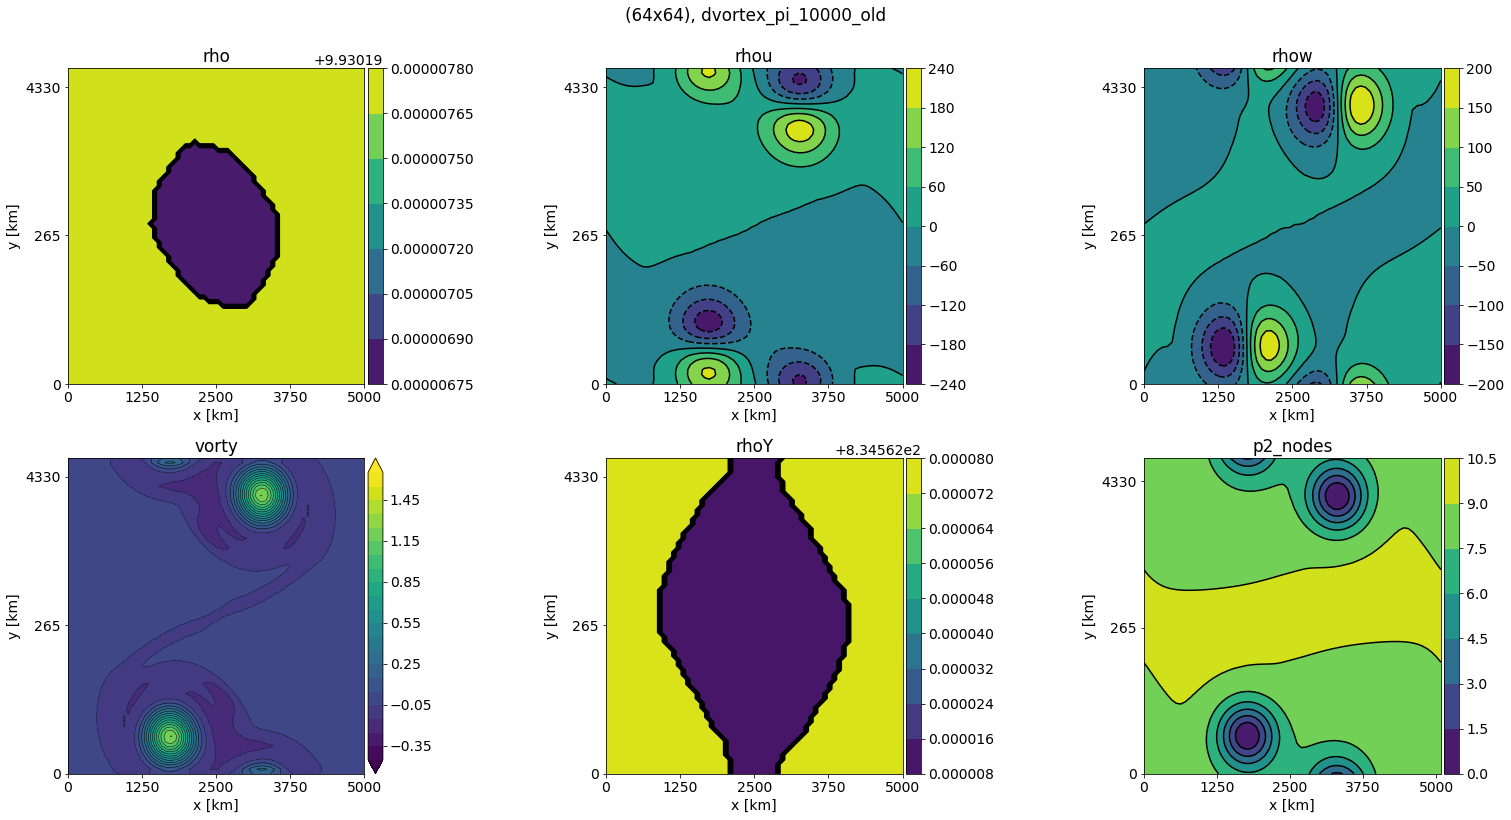

In [247]:
sfx = 'dvortex'

H0 = 10000
# H0 = 750
# H0 = 450

h_ref = 1000.0
sfx = 'dvortex_comp_%i_12s' %H0 
sfx = 'dvortex_pi_%i_old' %H0
# sfx = 'dvortex_comp_12s'

fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
# attributes = ['p2_nodes']

times = np.array([3.0,6.0,10.0])*86400.0
times = np.array([86400.0]) * 10.0
times = np.array([72.0])*10.0
# times = [432.0]

lbls = [3.0,6.0,10.0]
# lbls = [10.0]
# t_lbl = [1.0]
# t_lbl = times
# t_lbl = 'WINDOW_STEP

# t_lbl = [10.0]

tag = tags[9]
print(tag)
# tag = 'ic'
# times = [0]

slc = 0
arr_lst = []
time_series = np.zeros((np.array(times).shape[0],len(attributes),2), dtype='object')

class oo(object):
    def __init__(self):
        None
        
oo = oo()
t_lbl = 'TIME'
# t_lbl = 'WINDOW_STEP'


for tt,time in enumerate(times):
    print(time)
    for atr_idx, attribute in enumerate(attributes):
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0][:,slc,:]
        arr = arr.T
        
        if attribute == 'rho':
            rho = np.copy(arr)
#             arr -= H0 / h_ref

        if attribute == 'vorty':
            kernel = np.array([[1.0,1.0],[1.0,1.0]])
            kernel /= kernel.sum()
            arr = signal.convolve(arr, kernel, mode='valid')
            arr /= rho
#             arr *= 86400.0*1000.0#/1200
            arr *= 86400.0 / 1200

        setattr(oo,attribute,arr)
        
#         if attribute == 'p2_nodes' and 'comp' in sfx:
#         if attribute == 'p2_nodes' and 'psinc' in sfx:
        if attribute == 'p2_nodes':
            p2_diff = arr.max() - arr.min()
            arr -= arr.min()
            
#             arr = p2_diff * (arr - arr.min())
            
        arr_lst.append([arr,attribute])
        
        arr = [arr,attribute]
        time_series[tt,atr_idx] = arr

fs = (22,5.5)
fs = (22,12)
# fs = (6,6)
ncolslen = int(len(attributes)/2) if len(attributes) > 1 else 1
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
lvl = np.arange(-0.45,1.7,0.1)
# lvl = np.arange(-8.0,10.0,1.0)
# lvl_vort = np.arange(-8.0,28.0,2.0) # 750
# lvl_vort = np.arange(-13.0,53.0,3.0) # 450
# lvl = np.arange(-120,30,10) / h_ref
# lvls = [None] * len(attributes)
# lvls[0] = lvl
lvls[3] = lvl

x_axs = [0,1250,2500,3750,5000]
y_axs = [0,265,4330]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,3)
x_label = r'x [km]'
y_label = r'y [km]'
st = 'SWE shear flow (%ix%i), $\Delta t = 12s$. Potential vortcity in the (x-z) plane.' %(Nx,Nz)
st = '(%ix%i), %s' %(Nx,Nz, sfx)

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour',suptitle=st,lvls=lvls)
# _ = pl.plot(aspect='equal',method='contour',lvls=lvls)
# _ = pl.plot(aspect='equal',method='contour',suptitle=st)
#     ts.append(arr_lst)
# pl.save_fig('icshear')

dvortex_comp_10000_noda
(1, 10, 64, 68)
(64, 68)
10
5


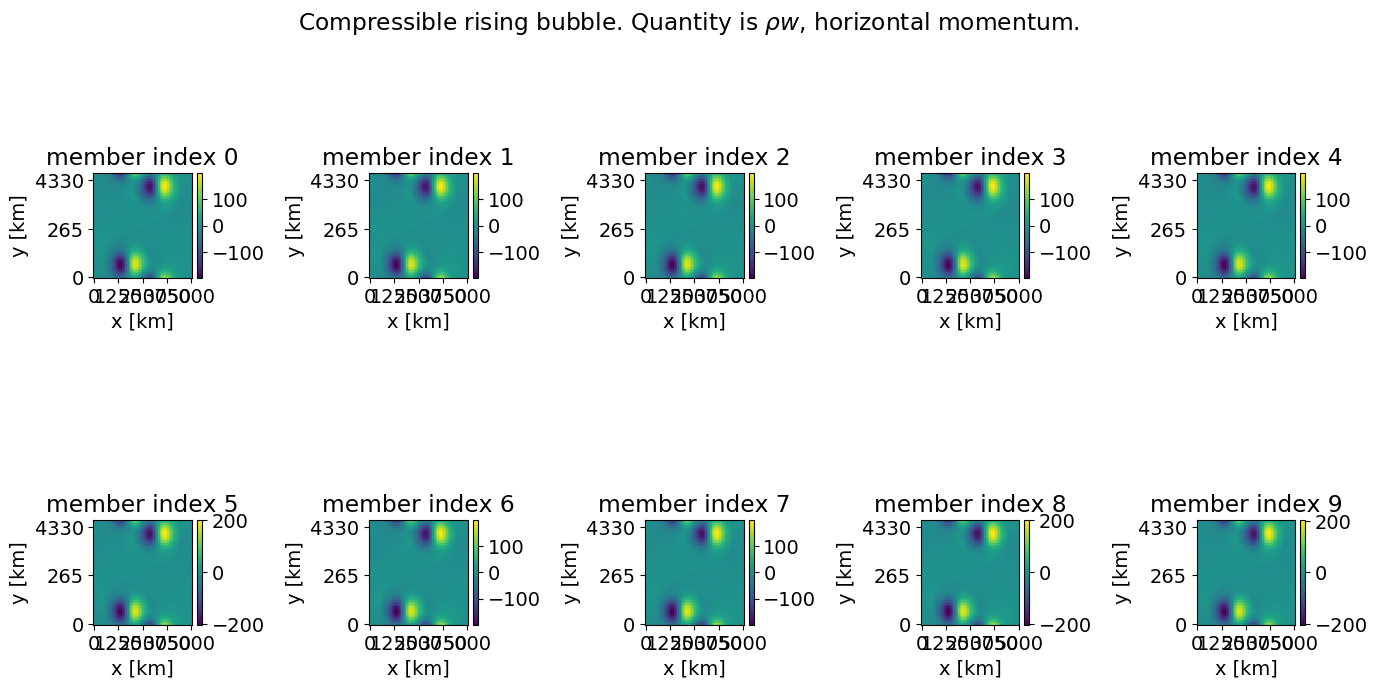

In [164]:
import random

random.seed(444)

N = 10
sfx = "dvortex_comp_10000_noda"
print(sfx)
attribute = 'rhow'
times = [720.0]
# times = [0.1,1.0,2.0]
# times = [0.1,0.2,0.3]

ens = tc.get_ensemble(times, N, attribute, sfx)[:,:,:,0,:]
print(ens.shape)
mean = np.mean(ens[0],axis=0)
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0])
    print(ncolslen)
#     fs = (18,6)
    fs = (14,8)
    
    arr_lst = [[arr.T,'member index %i' %n] for n,arr in enumerate(ens_at)]
#     arr_lst = random.sample(arr_lst, k=3)
#     arr_lst.append(mean)
    ncolslen = int(np.ceil(len(arr_lst)/2))
    print(ncolslen)
    
    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

    x_axs = [0,1250,2500,3750,5000]
    y_axs = [0,265,4330]
    x_loc = np.linspace(0,Nx-1,5)
    y_loc = np.linspace(0,Nz-1,3)
    x_label = r'x [km]'
    y_label = r'y [km]'

    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

    st = "Compressible rising bubble. Quantity is %s." %attr_labels[attribute]
    _ = pl.plot(aspect='equal',method='imshow',suptitle=st)
    pl.save_fig('../img/rb_ens_%s' %sfx)

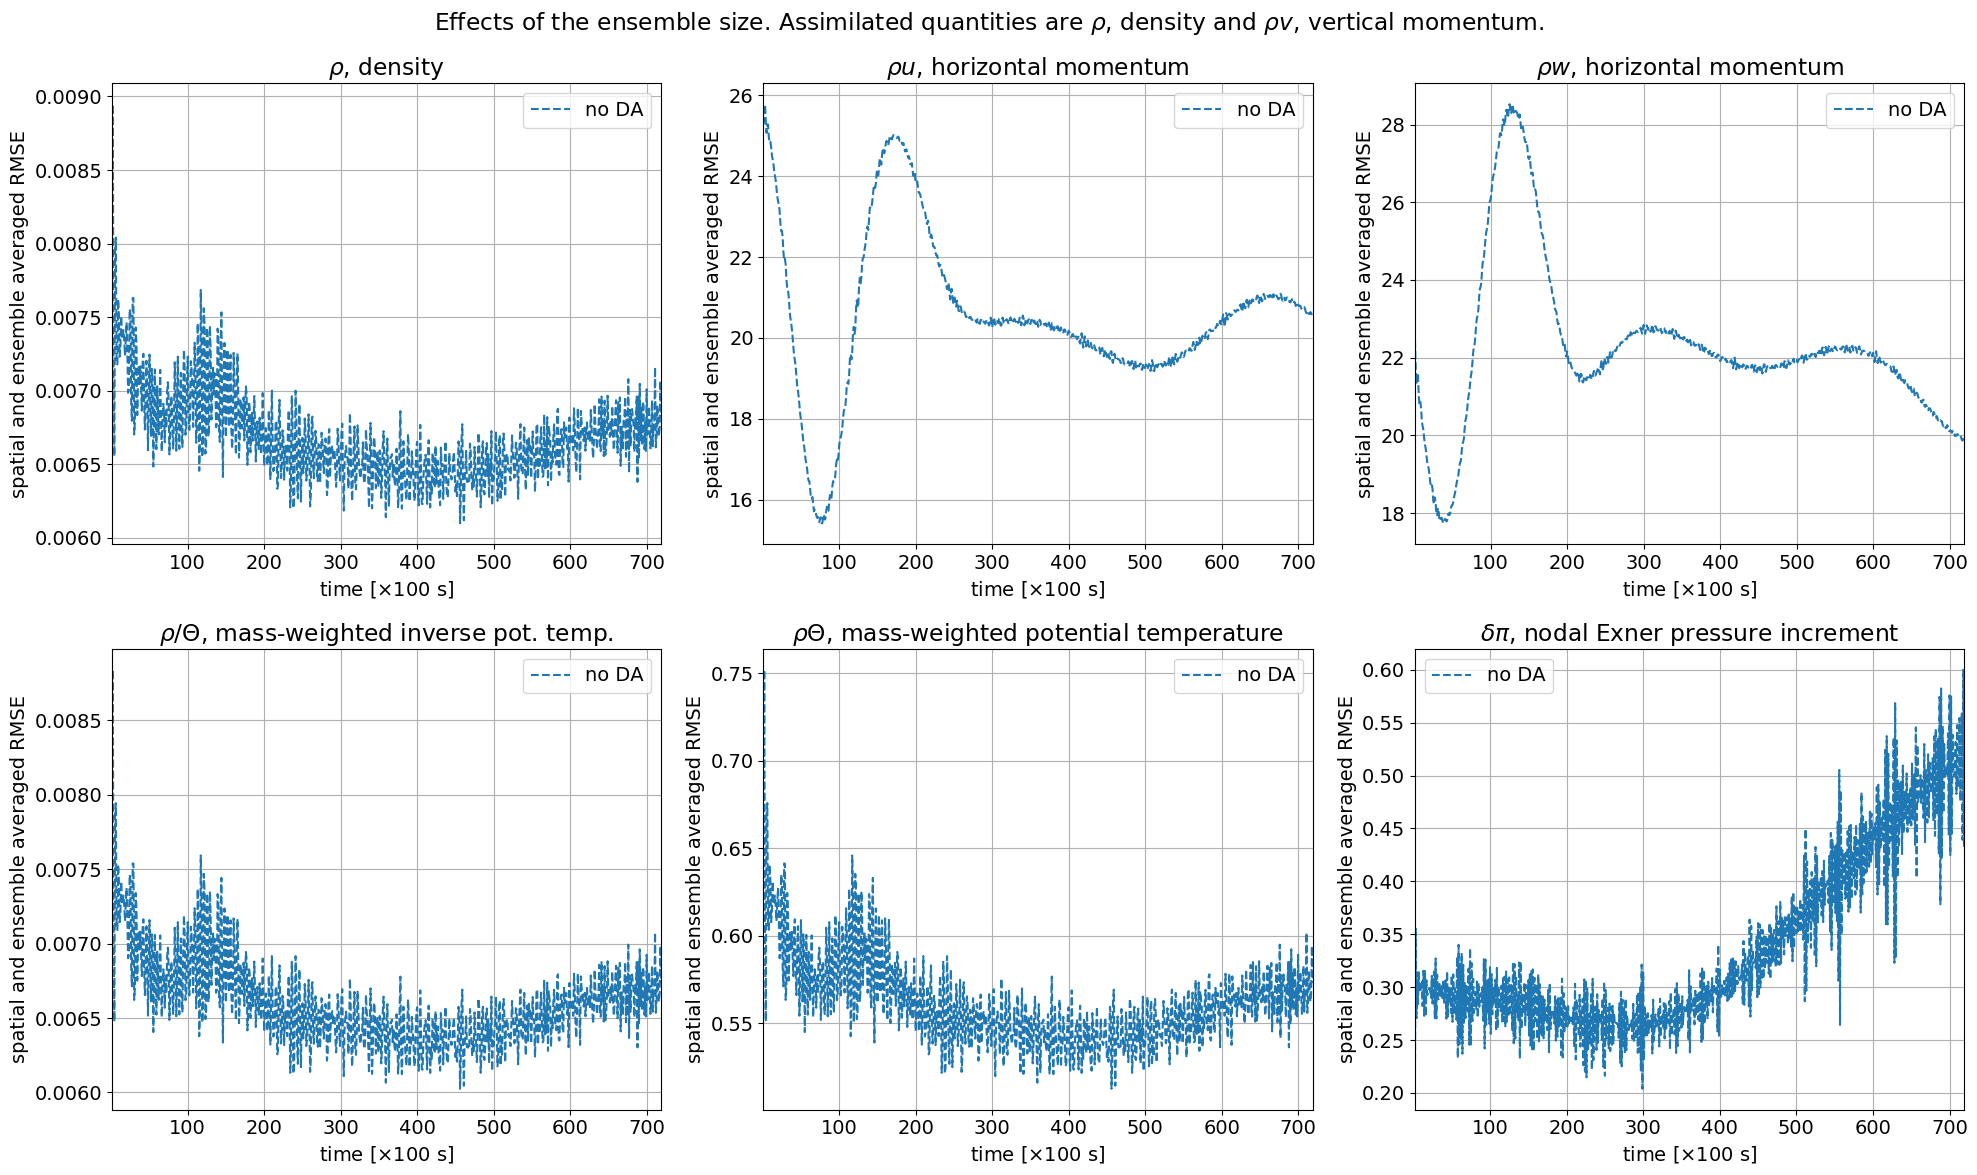

In [154]:
attributes = ['rho','rhou','rhow','rhoX','rhoY','p2_nodes']

base_fn = "output_swe_dvortex"
directory = "output_swe_dvortex"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 64
Ny = 1
Nz = 64
et = 720.0
# times = np.arange(0.0,10.0,0.1)[1:]
times = np.arange(0.0,720.0)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_ens_size'
title = 'Effects of the ensemble size'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=Nz)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

FD = 4.0

def get_ens(sfx,diff,N=10):
    return tc.get_ensemble(times, N, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'dvortex_comp_10000_noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
#     ens_1_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
#     ens_1_label = r'K=10'
    
#     ens_2_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
#     ens_2_label = r'K=20'

#     ens_3_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
#     ens_3_label = r'K=30'
    
#     ens_4_suffix = 'obs_psinc_wdawloc_%.1f_rho_rhov' %FD
#     ens_4_label = r'K=40'

#     ens_1 = get_ens(ens_1_suffix, diff, 10)
#     ens_2 = get_ens(ens_2_suffix, diff, 20)
#     ens_3 = get_ens(ens_3_suffix, diff, 30)
#     ens_4 = get_ens(ens_4_suffix, diff, 40)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'dvortex_comp_10000', label_type='TIME',avg=True, diff=diff)

    ens_noda = ens_noda[:,:,0,:]
    psinc = psinc[:,:,0,:]
    
    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
#         diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
#         diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
#         diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
#         diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
#     ax.plot(times,diff_ens_1, label=ens_1_label)
#     ax.plot(times,diff_ens_2, label=ens_2_label)
#     ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s_%.1f.pdf' %(py_directory,fn,FD))
plt.show()

In [176]:
0.5/9.93e3

5.0352467270896274e-05